## Data Processing and Visualization
### CPE 695 Final Project - Genre Prediction

Spring 2023

In [16]:
import pandas as pd

DATA_PATH = '../data_processed/Iteration_2/Labeled_Data_Final.csv'

def load_data(data_path=DATA_PATH):
    return pd.read_csv(data_path)

music = load_data()
music.head()

,Unnamed: 0,Genre,Artist Name,Release Name,Song Title,Duration,Key,Mode,Loudness,Tempo,...,Segment Pitch 11 Average,Segment Timbre 11 Average,Segment Pitch 11-11 Covariance,Segment Timbre 11-11 Covariance,Segment Pitch 11-12 Covariance,Segment Timbre 11-12 Covariance,Segment Pitch 12 Average,Segment Timbre 12 Average,Segment Pitch 12-12 Covariance,Segment Timbre 12-12 Covariance
0,0,alternative metal,Adelitas Way,Adelitas Way,Scream,213.94240,1,1,-4.769,99.944,...,0.438499,-0.611774,0.100794,127.725666,0.021161,17.824645,0.290101,6.441774,0.054032,160.753151
1,1,rock,Western Addiction,Cognicide,A Poor Recipe For Civic Cohesion,118.07302,7,1,-7.240,125.475,...,0.321672,-1.225157,0.043175,161.234281,-0.000650,-4.841236,0.610222,1.994838,0.105614,113.717438
2,2,hip hop,Casual,Fear Itself,I Didn't Mean To,218.93179,1,0,-11.197,92.198,...,0.306680,-13.563280,0.083510,601.389784,0.008330,-23.752621,0.324174,5.442480,0.114662,314.556380
3,3,0,Alquimia,Forever,The Lark In The Clear Air,193.01832,2,1,-13.179,41.279,...,0.077480,-1.670094,0.008980,329.428896,0.007631,59.228727,0.212064,2.391530,0.093695,884.581488
4,4,blue-eyed soul,The Box Tops,Dimensions,Soul Deep,148.03546,6,0,-9.843,121.274,...,0.218373,-2.752638,0.026550,259.467441,0.011148,-37.508893,0.291395,1.729396,0.093845,146.412662


In [17]:
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89502 entries, 0 to 89501
Columns: 194 entries, Unnamed: 0 to Segment Timbre 12-12 Covariance
dtypes: float64(186), int64(4), object(4)
memory usage: 132.5+ MB


## Drop rows with missing data

In [18]:
import numpy as np

# Drop columns we won't use
music_clean = music.drop(columns=["Unnamed: 0", "Artist Name", "Release Name", "Song Title"])
# music_clean = music.drop(columns=["Unnamed: 0"])

# Drop rows of data based on missing data or low confidence
# music_clean = music_clean[music_clean.loc[:, "MB Genre"] != "0"] # Dropped to 7416 instances
# music_clean = music_clean[music_clean.loc[:, "Key Confidence"] >= 0.001] # Dropped to 7035 instances
# music_clean = music_clean[music_clean.loc[:, "Mode Confidence"] >= 0.001] # Dropped to 7019
# music_clean = music_clean[music_clean.loc[:, "Tempo"] != 0.0] # Dropped to 7007
# music_clean = music_clean[music_clean.loc[:, "Time Signature Confidence"] != 0.0] # Dropped to 5465

music_clean = music_clean[music_clean.loc[:, "Genre"] != "0"] 
# print(music_clean.loc[:, "End of Fade In"].value_counts())
music_clean.info()
music_clean.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71402 entries, 0 to 89501
Columns: 190 entries, Genre to Segment Timbre 12-12 Covariance
dtypes: float64(186), int64(3), object(1)
memory usage: 104.0+ MB


,Genre,Duration,Key,Mode,Loudness,Tempo,Time Signature,End of Fade In,Song Hotness,Start of Fade Out,...,Segment Pitch 11 Average,Segment Timbre 11 Average,Segment Pitch 11-11 Covariance,Segment Timbre 11-11 Covariance,Segment Pitch 11-12 Covariance,Segment Timbre 11-12 Covariance,Segment Pitch 12 Average,Segment Timbre 12 Average,Segment Pitch 12-12 Covariance,Segment Timbre 12-12 Covariance
0,alternative metal,213.94240,1,1,-4.769,99.944,4,0.000,0.461318,210.048,...,0.438499,-0.611774,0.100794,127.725666,0.021161,17.824645,0.290101,6.441774,0.054032,160.753151
1,rock,118.07302,7,1,-7.240,125.475,4,0.264,0.386606,115.142,...,0.321672,-1.225157,0.043175,161.234281,-0.000650,-4.841236,0.610222,1.994838,0.105614,113.717438
2,hip hop,218.93179,1,0,-11.197,92.198,4,0.247,0.401998,218.932,...,0.306680,-13.563280,0.083510,601.389784,0.008330,-23.752621,0.324174,5.442480,0.114662,314.556380
4,blue-eyed soul,148.03546,6,0,-9.843,121.274,4,0.148,0.417500,137.915,...,0.218373,-2.752638,0.026550,259.467441,0.011148,-37.508893,0.291395,1.729396,0.093845,146.412662
5,hip hop,252.94322,6,0,-7.227,161.990,4,0.000,0.379282,247.455,...,0.273554,-6.673477,0.041711,678.019827,0.008622,-68.920530,0.329846,5.786463,0.129479,252.791492


In [19]:
# print(music_clean.loc[:, "MB Genre"].value_counts())
# common_genres = music_clean.loc[:, "MB Genre"].value_counts().index[music_clean.loc[:, "MB Genre"].value_counts() > 31]
common_genres = music_clean.loc[:, "Genre"].value_counts().index[music_clean.loc[:, "Genre"].value_counts() > 500]

# music_clean = music_clean[music_clean["MB Genre"].isin(common_genres)] # Drops to 3980
music_clean = music_clean[music_clean["Genre"].isin(common_genres)]

music_clean.info()
# print(music_clean.loc[:, "Genre"].value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49104 entries, 0 to 89496
Columns: 190 entries, Genre to Segment Timbre 12-12 Covariance
dtypes: float64(186), int64(3), object(1)
memory usage: 71.6+ MB


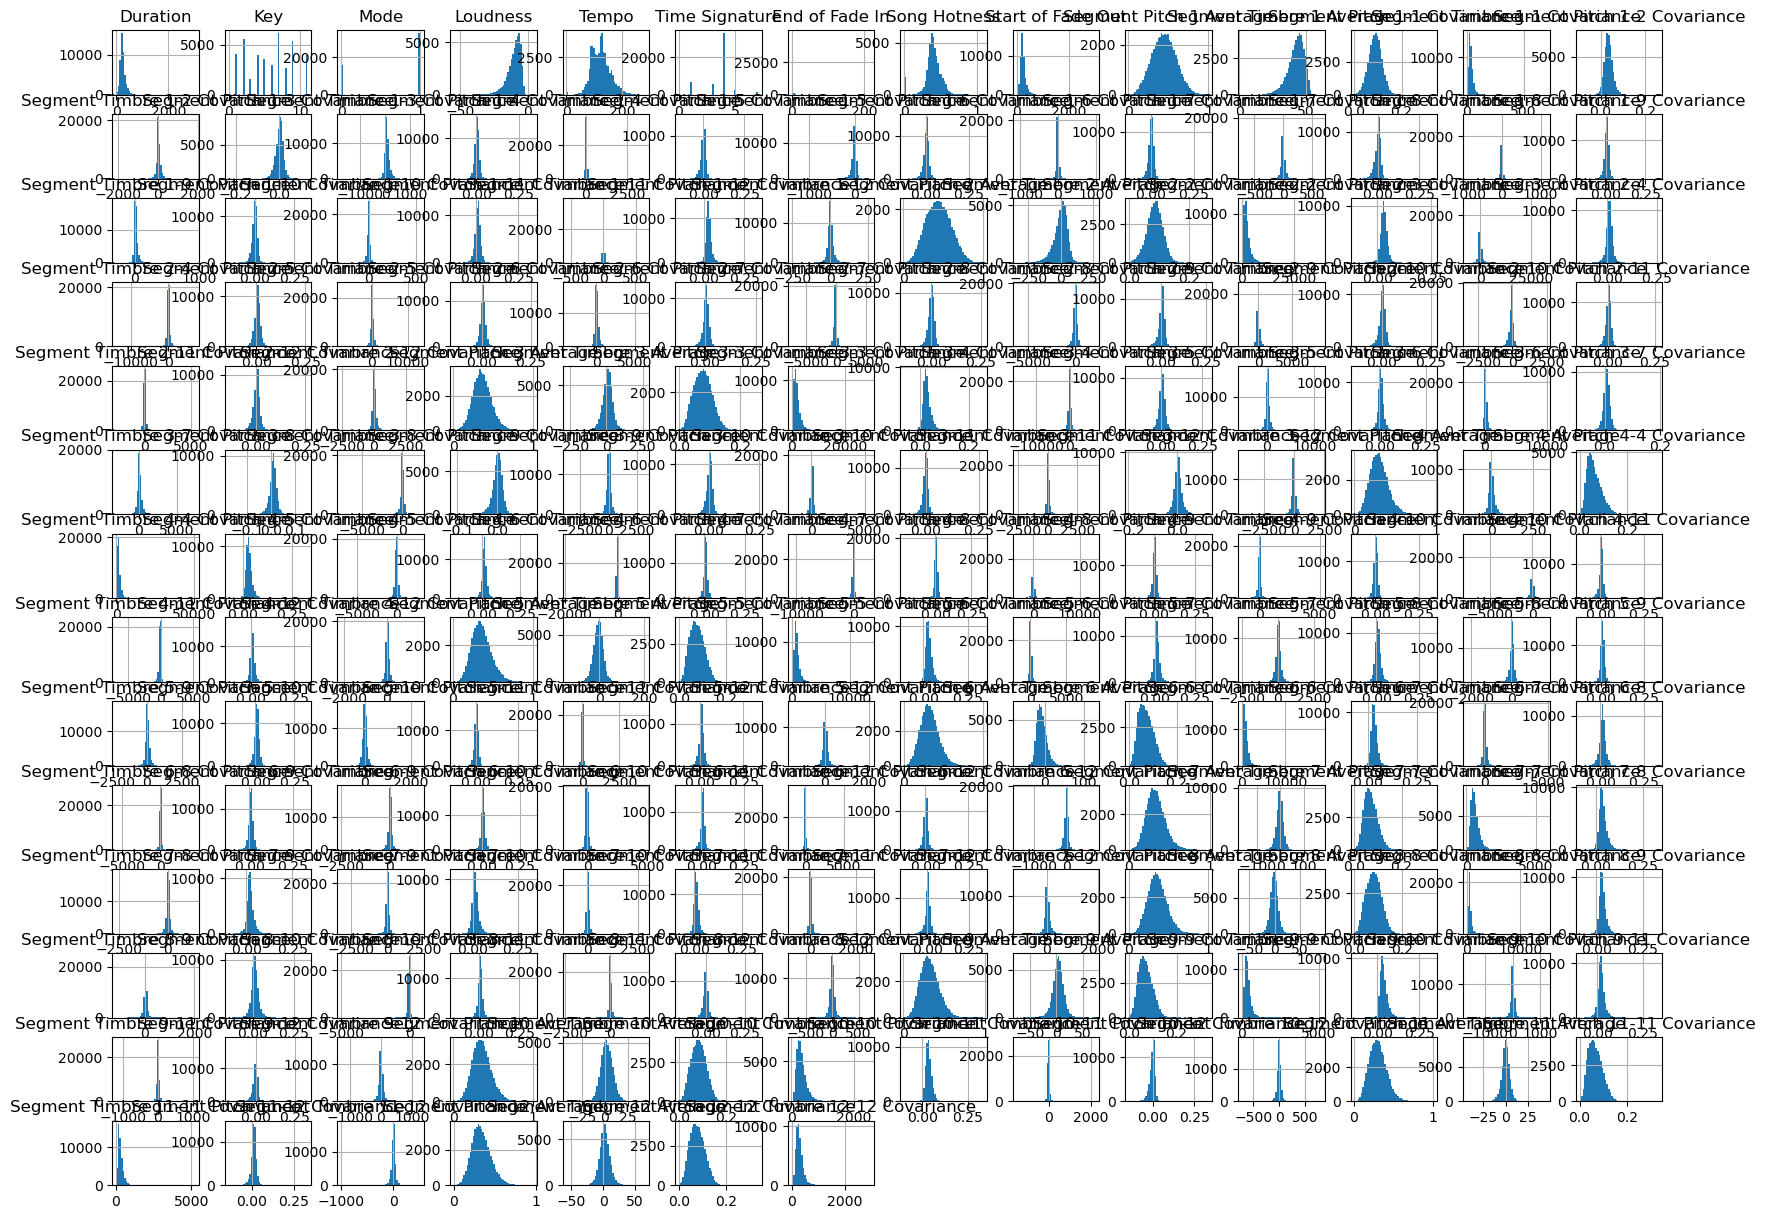

KeyError: "['Duration (sec)', 'Interval 1 Count'] not in index"

In [20]:

import matplotlib.pyplot as plt
music_clean.hist(bins=50, figsize=(20,15))
#save_fig("music_histogram_plots")
plt.show()

from pandas.plotting import scatter_matrix

attributes = ["Key", "Duration (sec)", "Mode",
              "Tempo", "Interval 1 Count"]
scatter_matrix(music[attributes], figsize=(12, 8))
#save_fig("scatter_matrix_plot")

## Run Data Through Pipeline
Encode genres into one hot encoded lists

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


# Create and transform columns
# full_pipeline = ColumnTransformer([
#         ("label_encoder_num", OrdinalEncoder(), ["MB Genre"]),
#         ("label_encoder_1hot", OneHotEncoder(), ["MB Genre"]),
#         ('duration_scaler', StandardScaler(), ["Duration (sec)"]),
#         ('key_mode_passthrough', 'passthrough', ["Key", "Key Confidence","Mode", "Mode Confidence"]),
#         ('loudness_tempo_scaler', StandardScaler(), ["Loudness", "Tempo"]),
#         ('signature_passthrough', 'passthrough', ["Time Signature", "Time Signature Confidence"]),
#         ('fade_count_scaler', StandardScaler(), np.r_[10:23])
# ])

full_pipeline = ColumnTransformer([
        ("label_encoder_num", OrdinalEncoder(), ["Genre"]),
        ('duration_scaler', StandardScaler(), ["Duration"]),
        ('key_mode_passthrough', 'passthrough', ["Key", "Mode"]),
        ('loudness_tempo_scaler', StandardScaler(), ["Loudness", "Tempo"]),
        ('signature_passthrough', 'passthrough', ["Time Signature"]),
        ('end_of_fade_in_scaler', StandardScaler(), ["End of Fade In"]),
        ('song_hotness_scaler', StandardScaler(), ["Song Hotness"]),
        ('start_of_fade_out_scaler', StandardScaler(), ["Start of Fade Out"]),
        ("all_features_scaler", StandardScaler(), np.r_[9:189])
])

# Apply transformations
music_prepared = pd.DataFrame(full_pipeline.fit_transform(music_clean))

# Generate column names for export
# column_names = ["Genre Num"] + sorted(common_genres.values.tolist()) + music_clean.columns.tolist()[1:-1]
# column_names = music_clean.columns.tolist()
# display(column_names)
music_prepared.columns = music_clean.columns.tolist()
display(music_prepared)

# Re-index pre-transformed data for export
music_pre_pipeline = music_clean.reset_index(drop=True)
display(music_pre_pipeline)

,Genre,Duration,Key,Mode,Loudness,Tempo,Time Signature,End of Fade In,Song Hotness,Start of Fade Out,...,Segment Pitch 11 Average,Segment Timbre 11 Average,Segment Pitch 11-11 Covariance,Segment Timbre 11-11 Covariance,Segment Pitch 11-12 Covariance,Segment Timbre 11-12 Covariance,Segment Pitch 12 Average,Segment Timbre 12 Average,Segment Pitch 12-12 Covariance,Segment Timbre 12-12 Covariance
0,0.0,-0.311231,1.0,1.0,1.032401,-0.686581,4.0,-0.358868,0.519566,-0.274110,...,-0.113111,1.216918,-0.096103,1.144198,-0.859136,0.659778,0.408379,-0.399120,0.455629,-0.757169
1,28.0,-1.078877,7.0,1.0,0.561412,0.050411,4.0,-0.245562,-0.100191,-1.046973,...,0.633337,0.148643,-0.229602,-0.796359,-0.696705,-0.602219,-0.081385,2.336089,-0.074057,0.880985
2,20.0,-0.271280,1.0,0.0,-0.192817,-0.910181,4.0,-0.252858,0.027483,-0.201763,...,0.511243,0.011551,-2.914915,0.562070,1.436927,-0.082633,-0.490022,-0.107988,0.336600,1.168349
3,20.0,0.001056,6.0,0.0,0.563890,1.104472,4.0,-0.358868,-0.160945,0.030513,...,0.015050,-0.291350,-1.415394,-0.845662,1.808387,-0.065719,-1.466010,-0.059522,0.377573,1.638904
4,5.0,1.149388,7.0,1.0,-0.579367,0.376400,1.0,-0.144702,-0.091809,1.164677,...,0.396985,-1.376417,0.094709,-1.350762,-0.464191,0.804272,0.321656,-0.604568,0.454040,0.053295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49099,7.0,0.096855,6.0,1.0,-1.123167,-1.813531,3.0,-0.358868,0.848243,0.070554,...,0.776343,0.010869,-0.055265,0.797757,-0.085674,-0.970689,-0.638953,-0.112256,0.704469,1.610949
49100,15.0,-0.892927,7.0,1.0,0.973503,0.098531,4.0,-0.193200,-2.158620,-0.908461,...,-0.444283,-1.200589,-1.082457,-0.804671,-0.709633,-0.098360,1.420759,-1.100766,-3.194639,-0.874167
49101,22.0,2.602686,3.0,1.0,-3.382806,-1.320721,3.0,-0.237407,-0.629075,2.565279,...,-2.711564,0.040352,0.144839,1.525614,-0.733585,-0.123598,1.974753,-1.728262,0.106051,-1.070126
49102,13.0,-1.466256,6.0,0.0,0.741916,-0.763597,3.0,-0.248137,0.565047,-1.417077,...,-0.638184,-0.367398,0.022856,-0.497639,1.005350,-0.260189,-0.898450,-0.882128,0.167518,-0.515304


,Genre,Duration,Key,Mode,Loudness,Tempo,Time Signature,End of Fade In,Song Hotness,Start of Fade Out,...,Segment Pitch 11 Average,Segment Timbre 11 Average,Segment Pitch 11-11 Covariance,Segment Timbre 11-11 Covariance,Segment Pitch 11-12 Covariance,Segment Timbre 11-12 Covariance,Segment Pitch 12 Average,Segment Timbre 12 Average,Segment Pitch 12-12 Covariance,Segment Timbre 12-12 Covariance
0,alternative metal,213.94240,1,1,-4.769,99.944,4,0.000,0.461318,210.048,...,0.438499,-0.611774,0.100794,127.725666,0.021161,17.824645,0.290101,6.441774,0.054032,160.753151
1,rock,118.07302,7,1,-7.240,125.475,4,0.264,0.386606,115.142,...,0.321672,-1.225157,0.043175,161.234281,-0.000650,-4.841236,0.610222,1.994838,0.105614,113.717438
2,hip hop,218.93179,1,0,-11.197,92.198,4,0.247,0.401998,218.932,...,0.306680,-13.563280,0.083510,601.389784,0.008330,-23.752621,0.324174,5.442480,0.114662,314.556380
3,hip hop,252.94322,6,0,-7.227,161.990,4,0.000,0.379282,247.455,...,0.273554,-6.673477,0.041711,678.019827,0.008622,-68.920530,0.329846,5.786463,0.129479,252.791492
4,blues rock,396.35546,7,1,-13.225,136.768,1,0.499,0.387617,386.728,...,0.154891,0.264944,0.026714,209.200629,0.023659,13.811172,0.266056,6.428435,0.079552,235.581987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49099,contemporary jazz,264.90730,6,1,-16.078,60.904,3,0.000,0.500941,252.372,...,0.306605,-0.424136,0.090508,287.286419,-0.007018,-30.645043,0.323675,8.530892,0.128599,349.933401
49100,folk,141.29587,7,1,-5.078,127.142,4,0.386,0.138462,132.151,...,0.174119,-5.143742,0.042928,158.567275,0.008058,64.676755,0.207982,-24.203788,0.050348,411.234962
49101,jazz,577.85424,3,1,-27.933,77.976,3,0.283,0.322849,558.719,...,0.309829,0.495276,0.112119,153.626105,0.007622,90.315138,0.134542,3.506917,0.044178,685.157683
49102,electro,69.69424,6,0,-6.293,97.276,3,0.258,0.466801,69.694,...,0.265238,-0.065195,0.052045,512.358138,0.005261,-42.654340,0.233571,4.022964,0.061648,267.827147


## Split Test/Train Data

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

music_train, music_test = train_test_split(music_prepared, test_size=0.2, random_state=42)

display(music_test)

,Genre,Duration,Key,Mode,Loudness,Tempo,Time Signature,End of Fade In,Song Hotness,Start of Fade Out,...,Segment Pitch 11 Average,Segment Timbre 11 Average,Segment Pitch 11-11 Covariance,Segment Timbre 11-11 Covariance,Segment Pitch 11-12 Covariance,Segment Timbre 11-12 Covariance,Segment Pitch 12 Average,Segment Timbre 12 Average,Segment Pitch 12-12 Covariance,Segment Timbre 12-12 Covariance
15458,3.0,-0.131347,1.0,1.0,1.110168,-0.830163,4.0,0.582774,1.479773,-0.120426,...,-0.291264,-0.415291,0.358244,0.959976,-0.529284,0.450672,0.953594,-1.135617,-1.063247,-1.579598
18393,20.0,-0.112103,7.0,1.0,0.733339,1.850528,4.0,-0.277751,-0.091178,-0.138439,...,0.568527,1.981447,-1.061676,1.157729,1.511451,-3.950371,-0.216655,0.865480,-0.760058,1.624341
46218,1.0,0.380487,8.0,1.0,1.106928,2.322727,5.0,4.317579,1.504851,0.403964,...,-0.210027,1.459853,-0.394085,0.472181,-0.705093,0.473693,0.164829,0.144313,-0.171805,-0.233944
465,11.0,0.317318,9.0,1.0,0.513760,-1.350685,4.0,-0.175604,1.445476,0.326772,...,0.741198,-0.063647,0.077161,-0.288563,-0.119527,0.569274,-0.719090,0.390197,0.708937,0.914969
48423,22.0,1.221132,2.0,1.0,-1.910753,2.102821,3.0,3.159197,-0.214615,1.222072,...,-0.983671,-0.998448,-0.603168,-1.334211,-0.677395,-0.178295,1.586389,-1.264919,-0.834784,-0.823311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32846,4.0,2.150674,3.0,1.0,0.191826,-0.968723,5.0,-0.230540,-0.177368,2.241650,...,-0.320589,1.676049,0.047087,1.070860,0.489296,-0.470025,-0.806979,-0.228737,-0.728337,-0.273099
36502,14.0,0.689428,5.0,0.0,0.464775,1.048384,4.0,0.702517,0.122202,0.663968,...,1.116467,-0.100295,-0.181730,0.414812,2.398454,0.928418,-0.851198,0.028959,0.485758,0.720042
46638,14.0,0.171946,8.0,1.0,0.382623,0.411877,4.0,-0.358868,-0.229126,0.171102,...,0.305550,0.214334,1.011711,-0.135220,-0.506869,0.984955,-0.327141,0.142106,-0.358555,-0.507608
14977,13.0,-0.130929,9.0,0.0,0.306762,0.354058,5.0,-0.290197,0.266126,-0.080010,...,1.607961,2.104881,2.079630,2.089581,0.372429,-3.968396,-0.702636,-1.018665,-1.456587,0.022429


## Export Data

In [ ]:
from pathlib import Path  

# Export pre-transformed data
data_cleaned = Path('../data_processed/Iteration_2/data_cleaned_Final.csv')
music_clean.to_csv(path_or_buf=data_cleaned, index=False)

# Export train and test data
training_data = Path('../data_processed/Iteration_2/training_data_Final.csv')
test_data = Path('../data_processed/Iteration_2/test_data_Final.csv')

music_train.to_csv(path_or_buf=training_data, index=False)
music_test.to_csv(path_or_buf=test_data, index=False)